Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [43]:
#https://github.com/TaghreedAssi/machinelearning - Link to GitHub
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

<Axes: title={'center': 'Visualization of Data'}, xlabel='x1', ylabel='x2'>

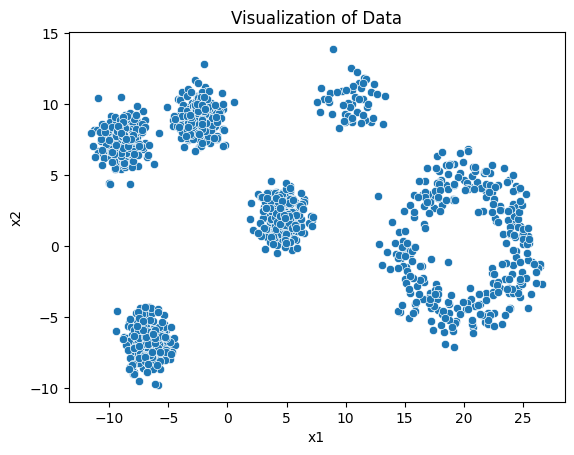

In [44]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data Visualization is here:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.title('Visualization of Data')
plt.xlabel('x1')
plt.ylabel('x2')
sns.scatterplot(x=X[:, 0], y=X[:, 1])






3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [45]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

# train the k_means for current value of k on the data
k_means = KMeans(n_clusters = 6, random_state = 42,n_init=18)

k_means.fit(X)



print("Silhouette score = " +str(silhouette_score(X, k_means.labels_)))



Silhouette score = 0.7251181630059241


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [46]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn import metrics


# train the hierarchical_cluster for current value of k on the data
hierarchical_cluster = AgglomerativeClustering(n_clusters=6)
hierarchical_cluster.fit(X)

print("Silhouette score = " +str(silhouette_score(X, hierarchical_cluster.labels_)))



Silhouette score = 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [47]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.metrics import silhouette_score


# train the DBSCAN_Cluster for current value of k on the data
DBSCAN_Cluster = DBSCAN(eps=1.7,min_samples=19,algorithm='kd_tree')

DBSCAN_Cluster.fit(X)

print("Silhouette score = " +str(silhouette_score(X,DBSCAN_Cluster.labels_)))



Silhouette score = 0.7125671527937365


6. Compare the results and choose the best method for the data


In [48]:
kmeans_silhouette=silhouette_score(X, k_means.labels_)
agg_silhouette=silhouette_score(X, hierarchical_cluster.labels_)
dbscan_silhouette=silhouette_score(X, DBSCAN_Cluster.labels_)
if kmeans_silhouette > agg_silhouette and kmeans_silhouette > dbscan_silhouette:
    best_method = "KMeans"
    best_score = kmeans_silhouette
elif agg_silhouette > kmeans_silhouette and agg_silhouette > dbscan_silhouette:
    best_method = "Agglomerative Clustering"
    best_score = agg_silhouette
else:
    best_method = "DBSCAN"
    best_score = dbscan_silhouette

# Print the  best result
print(f"The best clustering method  is: {best_method}")
print(f"with a Silhouette score of: {best_score}")


The best clustering method  is: Agglomerative Clustering
with a Silhouette score of: 0.7256900714288006
